# Comparing Fingerprint images by two different sensors

## 1. Data Collection

MASIVE is dataset of Fingerprint images collected using Light-emitting sensor(LES) technology.

SOCOFing is a dataset of Fingerprint images collected using Optical sensor technology.

Below cell stores path to respective folders of those.

In [40]:
MASSIVE_Path= 'C:\\Users\\2544403\\Downloads\\images_and_metadata\\images_and_metadata\\'
SOCOFing_path = 'C:/Users/2544403/Downloads/SOCOFing/SOCOFing/Real/'

In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2. Data Pre-processing

In [6]:
#importing libraries
from PIL import Image
from IPython.display import display
import os

In [42]:
#Function to get PPI value of image
def get_image_dimensions(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        return width, height
#Function to get colour scale of image  
def check_image_color_scale(image_path):
    with Image.open(image_path) as img:
        # Check if the image is in grayscale or color
        if img.mode == 'L':
            return "Grayscale"
        elif img.mode == 'RGB':
            return "Color"
        elif img.mode == 'CMYK':
            return "Color (CMYK)"
        else:
            return f"Unknown color scale ({img.mode})"

Now we'll check current resolution and colour scale of sample images from both datasets

In [43]:
#MASIVE
MASIVE_image_path= MASSIVE_Path + "session_1/DIN1/imp_1/Left_Index.BMP"
m_width, m_height = get_image_dimensions(MASIVE_image_path)
m_color_scale = check_image_color_scale(MASIVE_image_path)
print(f"MASIVE Image dimensions: {m_width} x {m_height} pixels and colourscale is {m_color_scale}")

#SOCOFing
SOCOFing_image_path= SOCOFing_path + "1__M_Left_index_finger.BMP"
s_width, s_height = get_image_dimensions(SOCOFing_image_path)
s_color_scale = check_image_color_scale(SOCOFing_image_path)
print(f"SOCOFing Image dimensions: {s_width} x {s_height} pixels and colourscale is {s_color_scale}")


MASIVE Image dimensions: 400 x 500 pixels and colourscale is Grayscale
SOCOFing Image dimensions: 96 x 103 pixels and colourscale is Unknown color scale (RGBA)


As MASSIVE image is already already in acceptable format, we'll need to do preprocess SOCOFing images only.

In [44]:
def convert_to_png(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
 
    # Get a list of all BMP files in the input folder
    bmp_files = [file for file in os.listdir(input_folder) if file.lower().endswith('.bmp')]
    # Iterate through each BMP file and convert to PNG
    for bmp_file in bmp_files:
        # Construct the full path for input and output images
        input_path = os.path.join(input_folder, bmp_file)
        output_path = os.path.join(output_folder, os.path.splitext(bmp_file)[0] + '.png')
 
        # Open the BMP image and save as PNG
        with Image.open(input_path) as img:
            # Calculate the scaling factor based on the target PPI
            current_ppi = img.info.get("dpi", (72, 72))[0]
            scale_factor = 500 / current_ppi

            # Calculate the new dimensions after resampling
            new_width = round(img.width * scale_factor)
            new_height = round(img.height * scale_factor)

            # Resample the image
            img_resampled = img.resize((new_width, new_height), resample=Image.LANCZOS)

            # Set the new DPI (PPI) for the image
            img_resampled.info["dpi"] = (500, 500)

            # Convert the image to grayscale
            img_gray = img_resampled.convert('L')

            # Save the image as PNG
            img_gray.save(output_path, format='PNG')

##### process images from SOCOFing

In [45]:
# Replace 'input_folder' and 'output_folder' with your actual folder paths
input_folder_path = SOCOFing_path
output_folder_path = 'C:/Users/2544403/Downloads/SOCOFing_processed_images'

In [46]:
convert_to_png(input_folder_path, output_folder_path)

In [47]:
#SOCOFing
SOCOFing_path= 'C:/Users/2544403/Downloads/SOCOFing_processed_images/'
SOCOFing_image_path= SOCOFing_path + "1__M_Left_index_finger.png"
s_width, s_height = get_image_dimensions(SOCOFing_image_path)
s_color_scale = check_image_color_scale(SOCOFing_image_path)
print(f"SOCOFing Image dimensions: {s_width} x {s_height} pixels and colourscale is {s_color_scale}")

SOCOFing Image dimensions: 500 x 537 pixels and colourscale is Grayscale


Now in order to give imput to NFIQ2 for batch processing, we'll get all these image names in single file

In [48]:
#SOCOFing images are in same file so this way we can get all image names in same file
IMAGE_DIRECTORY = "C:/Users/2544403/Downloads/SOCOFing_processed_images"
OUTPUT_FILE = "C:/Users/2544403/Downloads/SOCOFing_processed_images.txt"
image_files = [f for f in os.listdir(IMAGE_DIRECTORY) if f.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".bmp"))]
# Write image names to the output file
with open(OUTPUT_FILE, 'w') as file:
    for image_file in image_files:
        file.write( "C:/Users/2544403/Downloads/SOCOFing_processed_images/" + image_file + '\n')

In [49]:
# For MASIVE folder, hierarchy is MAin folder -> session 1 or 2 -> participant ID -> impressions -> images
#so the code will be as follows
def extract_file_names(folder_path):
    file_names = []
    # Walk through each directory and subdirectories
    for root, dirs, files in os.walk(folder_path):
        # Iterate through files in the current directory
        for file in files:
            # Append the absolute file path to the list
            file_names.append(os.path.join(root, file))
    return file_names

Session1_folder_path =MASSIVE_Path +'session_1\\'
Session2_folder_path =MASSIVE_Path +'session_2\\'

# Extract file names from the specified folder
file_names = extract_file_names(Session1_folder_path)

# Write the list of file names to a text file
output_file_path = r'C:\Users\2544403\Downloads\MASIVE_session_1.txt'
with open(output_file_path, 'w') as f:
    for file_name in file_names:
        f.write(file_name + '\n')
        
file_names = extract_file_names(Session2_folder_path)
output_file_path = r'C:\Users\2544403\Downloads\MASIVE_session_2.txt'
with open(output_file_path, 'w') as f:
    for file_name in file_names:
        f.write(file_name + '\n')

## 3. NFIQ2

Run these images through nfiq2

## 4. Data Cleaning

In [28]:
# reading dataframe
import pandas as pd
MASIVE_Session1_df=pd.read_csv("C:/Users/2544403/Downloads/MASIVE_session_1_output.csv")
MASIVE_Session2_df=pd.read_csv("C:/Users/2544403/Downloads/MASIVE_session_2_output.csv")
MASIVE_df= pd.concat([MASIVE_Session1_df,MASIVE_Session2_df])
SOCOFING_df=pd.read_csv("C:/Users/2544403/Downloads/SOCOFing_processed_images_output.csv")

In [51]:
MASIVE_Session1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6911 entries, 0 to 6910
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Filename                                6911 non-null   object 
 1   FingerCode                              6911 non-null   int64  
 2   QualityScore                            6911 non-null   int64  
 3   OptionalError                           0 non-null      float64
 4   Quantized                               6911 non-null   int64  
 5   Resampled                               6911 non-null   int64  
 6   UniformImage                            6911 non-null   float64
 7   EmptyImageOrContrastTooLow              6911 non-null   float64
 8   FingerprintImageWithMinutiae            6911 non-null   int64  
 9   SufficientFingerprintForeground         6911 non-null   int64  
 10  FDA_Bin10_0                             6911 non-null   int6

In [52]:
SOCOFING_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Filename                                6000 non-null   object 
 1   FingerCode                              6000 non-null   int64  
 2   QualityScore                            5954 non-null   float64
 3   OptionalError                           46 non-null     object 
 4   Quantized                               6000 non-null   int64  
 5   Resampled                               6000 non-null   int64  
 6   UniformImage                            5954 non-null   float64
 7   EmptyImageOrContrastTooLow              5954 non-null   float64
 8   FingerprintImageWithMinutiae            5954 non-null   float64
 9   SufficientFingerprintForeground         5954 non-null   float64
 10  FDA_Bin10_0                             5954 non-null   floa

In [53]:
SOCOFING_df_error=SOCOFING_df.loc[SOCOFING_df['OptionalError'].notnull(), ['Filename','OptionalError','QualityScore'] ]
SOCOFING_df_error.iloc[0][1]

C:\Users\2544403\AppData\Local\Temp\ipykernel_8388\3227930964.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


'Error: NFIQ2 computeQualityScore returned an error code: Width is too large after trimming whitespace. WxH: 1004x1242, but maximum width is 800'

In [54]:
SOCOFING_df.dropna(subset=['QualityScore'],inplace = True)
MASIVE_Session1_df.dropna(subset=['QualityScore'],inplace = True)

In [55]:
SOCOFING_df= SOCOFING_df[['Filename','QualityScore','UniformImage','EmptyImageOrContrastTooLow','FingerprintImageWithMinutiae',
                         'SufficientFingerprintForeground','FDA_Bin10_Mean','FDA_Bin10_StdDev','FingerJetFX_MinutiaeCount',
                         'ImgProcROIArea_Mean', 'LCS_Bin10_Mean', 'LCS_Bin10_StdDev','MMB','Mu','OCL_Bin10_Mean',
                         'OCL_Bin10_StdDev', 'OF_Bin10_Mean', 'OF_Bin10_StdDev','OrientationMap_ROIFilter_CoherenceRel',
                         'OrientationMap_ROIFilter_CoherenceSum','RVUP_Bin10_Mean','RVUP_Bin10_StdDev']]

In [56]:
MASIVE_Session1_df= MASIVE_Session1_df[['Filename','QualityScore','UniformImage','EmptyImageOrContrastTooLow','FingerprintImageWithMinutiae',
                         'SufficientFingerprintForeground','FDA_Bin10_Mean','FDA_Bin10_StdDev','FingerJetFX_MinutiaeCount',
                         'ImgProcROIArea_Mean', 'LCS_Bin10_Mean', 'LCS_Bin10_StdDev','MMB','Mu','OCL_Bin10_Mean',
                         'OCL_Bin10_StdDev', 'OF_Bin10_Mean', 'OF_Bin10_StdDev','OrientationMap_ROIFilter_CoherenceRel',
                         'OrientationMap_ROIFilter_CoherenceSum','RVUP_Bin10_Mean','RVUP_Bin10_StdDev']]

In [30]:
SOCOFING_df["image_name"]=SOCOFING_df["Filename"].str.split('/',n=5).str[5]
SOCOFING_df["participant_id"]=SOCOFING_df["image_name"].str.split('_',n=2).str[2]
SOCOFING_df["Gender"]=SOCOFING_df["image_name"].str.split('_').str[2]
SOCOFING_df["Hand"]=SOCOFING_df["image_name"].str.split('_').str[3]
SOCOFING_df["Finger_type"]=SOCOFING_df["image_name"].str.split('_').str[4]

In [58]:
SOCOFING_df.head()

,Filename,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,...,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,image_name,participant_id,Gender,Hand,Finger_type
0,C:/Users/2544403/Downloads/SOCOFing_processed_...,43.0,97.32249,136.60325,10.0,187611.0,0.65068,0.20969,10.0,101.08869,...,0.20973,0.72037,591.43080,1.01096,0.32047,100__M_Left_index_finger.png,M_Left_index_finger.png,M,Left,index
1,C:/Users/2544403/Downloads/SOCOFing_processed_...,39.0,103.10076,150.49048,6.0,158359.0,0.61343,0.19692,6.0,92.66848,...,0.27687,0.67381,464.92959,1.18393,1.06346,100__M_Left_little_finger.png,M_Left_little_finger.png,M,Left,little
2,C:/Users/2544403/Downloads/SOCOFing_processed_...,50.0,95.51814,134.81963,14.0,195821.0,0.62087,0.22256,14.0,107.01101,...,0.20248,0.71015,597.24107,1.01670,0.28534,100__M_Left_middle_finger.png,M_Left_middle_finger.png,M,Left,middle
3,C:/Users/2544403/Downloads/SOCOFing_processed_...,49.0,97.36400,144.50016,12.0,174621.0,0.61319,0.19964,12.0,102.29991,...,0.23735,0.71907,552.25223,1.14143,0.74640,100__M_Left_ring_finger.png,M_Left_ring_finger.png,M,Left,ring
4,C:/Users/2544403/Downloads/SOCOFing_processed_...,48.0,93.91088,146.94369,11.0,185681.0,0.60514,0.19294,11.0,118.32856,...,0.33844,0.63133,503.80605,1.00731,0.26601,100__M_Left_thumb_finger.png,M_Left_thumb_finger.png,M,Left,thumb


In [59]:
MASIVE_Session1_df["image_name"]=MASIVE_Session1_df["Filename"].str.split('\\',n=6).str[6].str.replace('\\','_')
MASIVE_Session1_df["participant_id"]=MASIVE_Session1_df["image_name"].str.split('_',n=3).str[2]
MASIVE_Session1_df["session"]=MASIVE_Session1_df["image_name"].str.split('_',n=2).str[1]
MASIVE_Session1_df["impression"]=MASIVE_Session1_df["image_name"].str.split('_',n=5).str[4]
MASIVE_Session1_df["Hand"]=MASIVE_Session1_df["image_name"].str.split('_',n=7).str[5]
MASIVE_Session1_df["Finger_type"]=MASIVE_Session1_df["image_name"].str.split('_',n=7).str[6].str.split('.',n=1).str[0]

In [60]:
MASIVE_Session1_df.head(5)

,Filename,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,...,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,image_name,participant_id,session,impression,Hand,Finger_type
0,C:\Users\2544403\Downloads\images_and_metadata...,63,78.89816,182.58614,28,56545,0.44134,0.11313,28,176.57209,...,0.73718,179.13652,0.96693,0.28286,session_1_DIN1_imp_1_Left_Index.bmp,DIN1,1,1,Left,Index
1,C:\Users\2544403\Downloads\images_and_metadata...,82,67.92557,201.89407,61,88085,0.39209,0.08350,61,196.57567,...,0.68851,259.57175,1.14043,0.51426,session_1_DIN1_imp_1_Left_Thumb.bmp,DIN1,1,1,Left,Thumb
2,C:\Users\2544403\Downloads\images_and_metadata...,66,78.94125,181.96267,35,54342,0.42106,0.12546,35,175.85423,...,0.72349,164.23337,1.09188,0.52169,session_1_DIN1_imp_1_Right_Index.bmp,DIN1,1,1,Right,Index
3,C:\Users\2544403\Downloads\images_and_metadata...,77,96.55222,175.09485,35,83731,0.44733,0.10307,35,165.91112,...,0.74392,262.60578,1.12330,0.69698,session_1_DIN1_imp_1_Right_Thumb.bmp,DIN1,1,1,Right,Thumb
4,C:\Users\2544403\Downloads\images_and_metadata...,65,76.83282,186.82605,31,61477,0.43926,0.14178,31,180.84415,...,0.70394,187.95209,1.05692,0.31234,session_1_DIN1_imp_2_Left_Index.bmp,DIN1,1,2,Left,Index


For MASIVE metadata is stored in another file, we weill need to merge those based on participant

In [103]:
metadata1_df=pd.read_excel(r"C:\Users\2544403\Downloads\images_and_metadata\images_and_metadata\metadata_1.xlsx")
metadata1_df['participant_id']="DIN" + metadata1_df['DIN'].astype(str)
MASIVE_df=pd.merge(MASIVE_Session1_df,metadata1_df,on="participant_id")
MASIVE_df.to_csv(r"C:\Users\2544403\Downloads\massivedf.csv")

ImportError: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).

In [66]:
MASIVE_df['dataset']='MASIVE'
SOCOFING_df['dataset']='SOCOFing'

In [125]:
final=pd.concat((SOCOFING_df,MASIVE_Session1_df),axis=0)
bin_ranges=[i for i in range(0, 101, 10)]
final['quality_score_bins'] = pd.cut(final['QualityScore'], bins=bin_ranges)

In [126]:
final.to_csv(r'C:\Users\2544403\Downloads\final_analysis.csv')

In [127]:
final=pd.read_csv(r'C:\Users\2544403\Downloads\final_analysis.csv')

In [128]:
final.head()

,Unnamed: 0,Filename,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,image_name,participant_id,Gender,Hand,Finger_type,dataset,session,impression,quality_score_bins
0,0,C:/Users/2544403/Downloads/SOCOFing_processed_...,43.0,97.32249,136.60325,10.0,187611.0,0.65068,0.20969,10.0,101.08869,0.77722,0.28940,134.39542,136.60325,0.84743,0.14526,0.13244,0.20973,0.72037,591.43080,1.01096,0.32047,100__M_Left_index_finger.png,M_Left_index_finger.png,M,Left,index,SOCOFing,NaN,NaN,"(40, 50]"
1,1,C:/Users/2544403/Downloads/SOCOFing_processed_...,39.0,103.10076,150.49048,6.0,158359.0,0.61343,0.19692,6.0,92.66848,0.74336,0.32207,147.26824,150.49048,0.80341,0.17980,0.19855,0.27687,0.67381,464.92959,1.18393,1.06346,100__M_Left_little_finger.png,M_Left_little_finger.png,M,Left,little,SOCOFing,NaN,NaN,"(30, 40]"
2,2,C:/Users/2544403/Downloads/SOCOFing_processed_...,50.0,95.51814,134.81963,14.0,195821.0,0.62087,0.22256,14.0,107.01101,0.78719,0.25955,132.75789,134.81963,0.84784,0.13253,0.13661,0.20248,0.71015,597.24107,1.01670,0.28534,100__M_Left_middle_finger.png,M_Left_middle_finger.png,M,Left,middle,SOCOFing,NaN,NaN,"(40, 50]"
3,3,C:/Users/2544403/Downloads/SOCOFing_processed_...,49.0,97.36400,144.50016,12.0,174621.0,0.61319,0.19964,12.0,102.29991,0.80000,0.25072,142.18292,144.50016,0.81428,0.19836,0.14752,0.23735,0.71907,552.25223,1.14143,0.74640,100__M_Left_ring_finger.png,M_Left_ring_finger.png,M,Left,ring,SOCOFing,NaN,NaN,"(40, 50]"
4,4,C:/Users/2544403/Downloads/SOCOFing_processed_...,48.0,93.91088,146.94369,11.0,185681.0,0.60514,0.19294,11.0,118.32856,0.79028,0.24000,143.57092,146.94369,0.77134,0.16234,0.28029,0.33844,0.63133,503.80605,1.00731,0.26601,100__M_Left_thumb_finger.png,M_Left_thumb_finger.png,M,Left,thumb,SOCOFing,NaN,NaN,"(40, 50]"


In [72]:
MASIVE_df.head()

,Filename,FingerCode,QualityScore,OptionalError,Quantized,Resampled,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,...,RVUP_Bin10_3,RVUP_Bin10_4,RVUP_Bin10_5,RVUP_Bin10_6,RVUP_Bin10_7,RVUP_Bin10_8,RVUP_Bin10_9,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,dataset
0,C:\Users\2544403\Downloads\images_and_metadata...,0,63.0,NaN,0,0,78.89816,182.58614,28.0,56545.0,...,22.0,75.0,36.0,4.0,2.0,0.0,0.0,0.96693,0.28286,MASIVE
1,C:\Users\2544403\Downloads\images_and_metadata...,0,82.0,NaN,0,0,67.92557,201.89407,61.0,88085.0,...,30.0,99.0,72.0,41.0,16.0,0.0,0.0,1.14043,0.51426,MASIVE
2,C:\Users\2544403\Downloads\images_and_metadata...,0,66.0,NaN,0,0,78.94125,181.96267,35.0,54342.0,...,21.0,68.0,32.0,11.0,11.0,0.0,0.0,1.09188,0.52169,MASIVE
3,C:\Users\2544403\Downloads\images_and_metadata...,0,77.0,NaN,0,0,96.55222,175.09485,35.0,83731.0,...,46.0,107.0,45.0,22.0,12.0,0.0,0.0,1.12330,0.69698,MASIVE
4,C:\Users\2544403\Downloads\images_and_metadata...,0,65.0,NaN,0,0,76.83282,186.82605,31.0,61477.0,...,13.0,95.0,51.0,8.0,6.0,0.0,0.0,1.05692,0.31234,MASIVE


## Data Analysis

In [104]:
MASIVE_Session1_df.describe()

,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev
count,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000,6911.000000
mean,60.779916,68.232294,192.897548,53.384315,80152.794820,0.430552,0.154222,53.384315,181.140857,0.753112,0.193960,196.612450,192.897548,0.738992,0.123884,0.245186,0.309764,0.594640,204.888278,1.141057,0.671300
std,21.352937,9.194389,23.033422,36.794102,22118.043822,0.036027,0.050046,36.794102,23.257024,0.079984,0.071590,21.469679,23.033422,0.103332,0.034502,0.093642,0.062950,0.111599,70.284388,0.102890,0.260804
min,0.000000,22.077930,100.282960,6.000000,11962.000000,0.298140,0.037840,6.000000,73.602180,0.180520,0.032360,106.275170,100.282960,0.255420,0.037340,0.033620,0.030350,0.164540,35.179680,0.872250,0.242240
25%,49.000000,62.923765,178.377830,33.500000,66191.500000,0.409500,0.121290,33.500000,167.140480,0.717885,0.144675,182.883600,178.377830,0.686960,0.099165,0.185595,0.270995,0.526040,155.864075,1.070750,0.482330
50%,67.000000,69.911840,193.906530,44.000000,80536.000000,0.429350,0.143330,44.000000,182.485390,0.774760,0.187070,197.548750,193.906530,0.761750,0.120840,0.223340,0.304480,0.611780,203.909310,1.117330,0.610650
75%,77.000000,74.693985,209.356945,60.000000,94770.000000,0.448990,0.176670,60.000000,197.518995,0.809210,0.242755,212.029105,209.356945,0.815025,0.144630,0.279215,0.346355,0.680645,252.513755,1.188030,0.805265
max,95.000000,109.509470,251.027700,255.000000,197706.000000,0.756400,0.373240,255.000000,245.774140,0.880700,0.396060,250.599030,251.027700,0.912010,0.266450,0.757830,0.537490,0.837950,439.234130,1.786220,2.317850


In [105]:
MASIVE_Session1_df[['QualityScore','UniformImage','EmptyImageOrContrastTooLow','FingerprintImageWithMinutiae','SufficientFingerprintForeground']].describe().applymap(lambda x: f"{x:0.2f}")

C:\Users\2544403\AppData\Local\Temp\ipykernel_8388\3788902256.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground
count,6911.00,6911.00,6911.00,6911.00,6911.00
mean,60.78,68.23,192.90,53.38,80152.79
std,21.35,9.19,23.03,36.79,22118.04
min,0.00,22.08,100.28,6.00,11962.00
25%,49.00,62.92,178.38,33.50,66191.50
50%,67.00,69.91,193.91,44.00,80536.00
75%,77.00,74.69,209.36,60.00,94770.00
max,95.00,109.51,251.03,255.00,197706.00


In [75]:
SOCOFING_df.describe()

,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,LCS_Bin10_Mean,...,MMB,Mu,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev
count,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,...,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000
mean,45.543668,96.502289,148.498504,44.375210,168425.541821,0.629492,0.222366,44.375210,99.909497,0.718712,...,145.586482,148.498504,0.767105,0.184511,0.279581,0.335946,0.631755,465.653383,1.127994,0.614816
std,7.070701,6.503767,22.863500,24.330967,28244.079508,0.041829,0.027024,24.330967,22.847515,0.077461,...,22.379844,22.863500,0.067553,0.036622,0.098616,0.061771,0.069881,88.144914,0.093711,0.317673
min,16.000000,60.478730,40.571180,6.000000,20060.000000,0.494700,0.144240,6.000000,13.765860,0.354460,...,39.882690,40.571180,0.447850,0.089990,0.065420,0.079660,0.289430,72.134810,0.894240,0.202610
25%,41.000000,93.238192,136.106760,28.000000,152931.250000,0.604048,0.202650,28.000000,86.454810,0.677845,...,133.424017,136.106760,0.732580,0.157502,0.210132,0.293743,0.587778,408.858587,1.064410,0.367198
50%,46.000000,97.228860,149.793340,38.000000,168733.000000,0.626790,0.219805,38.000000,100.293405,0.733705,...,146.939105,149.793340,0.779370,0.182530,0.259385,0.333865,0.640905,468.610860,1.109105,0.511575
75%,50.000000,100.661028,164.107067,54.000000,185025.750000,0.650890,0.240608,54.000000,114.276782,0.775130,...,160.862650,164.107067,0.815855,0.210068,0.326857,0.378182,0.683925,525.904998,1.171410,0.798835
max,72.000000,118.322290,226.428260,252.000000,268500.000000,0.849280,0.307260,252.000000,209.547510,0.863580,...,221.372050,226.428260,0.906300,0.319790,0.788040,0.515950,0.785660,703.155550,1.912970,2.430830


In [76]:
SOCOFING_df[['QualityScore','UniformImage','EmptyImageOrContrastTooLow','FingerprintImageWithMinutiae','SufficientFingerprintForeground']].describe().applymap(lambda x: f"{x:0.2f}")

C:\Users\2544403\AppData\Local\Temp\ipykernel_8388\81911249.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground
count,5954.00,5954.00,5954.00,5954.00,5954.00
mean,45.54,96.50,148.50,44.38,168425.54
std,7.07,6.50,22.86,24.33,28244.08
min,16.00,60.48,40.57,6.00,20060.00
25%,41.00,93.24,136.11,28.00,152931.25
50%,46.00,97.23,149.79,38.00,168733.00
75%,50.00,100.66,164.11,54.00,185025.75
max,72.00,118.32,226.43,252.00,268500.00


## Data Visualisation

In [106]:
MASIVE_high_df=MASIVE_df[MASIVE_Session1_df['QualityScore']==95]
MASIVE_high_df.head()

C:\Users\2544403\AppData\Local\Temp\ipykernel_8388\3551958203.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Filename,FingerCode,QualityScore,OptionalError,Quantized,Resampled,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_0,FDA_Bin10_1,FDA_Bin10_2,FDA_Bin10_3,FDA_Bin10_4,FDA_Bin10_5,FDA_Bin10_6,FDA_Bin10_7,FDA_Bin10_8,FDA_Bin10_9,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinCount_COMMinRect200x200,FingerJetFX_MinutiaeCount,FJFXPos_Mu_MinutiaeQuality_2,FJFXPos_OCL_MinutiaeQuality_80,ImgProcROIArea_Mean,LCS_Bin10_0,LCS_Bin10_1,LCS_Bin10_2,LCS_Bin10_3,LCS_Bin10_4,LCS_Bin10_5,LCS_Bin10_6,LCS_Bin10_7,LCS_Bin10_8,LCS_Bin10_9,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_0,OCL_Bin10_1,OCL_Bin10_2,OCL_Bin10_3,OCL_Bin10_4,OCL_Bin10_5,OCL_Bin10_6,OCL_Bin10_7,OCL_Bin10_8,OCL_Bin10_9,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_0,OF_Bin10_1,OF_Bin10_2,OF_Bin10_3,OF_Bin10_4,OF_Bin10_5,OF_Bin10_6,OF_Bin10_7,OF_Bin10_8,OF_Bin10_9,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_0,RVUP_Bin10_1,RVUP_Bin10_2,RVUP_Bin10_3,RVUP_Bin10_4,RVUP_Bin10_5,RVUP_Bin10_6,RVUP_Bin10_7,RVUP_Bin10_8,RVUP_Bin10_9,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,dataset
281,C:\Users\2544403\Downloads\images_and_metadata...,0,95.0,NaN,0,0,77.50061,163.72569,68.0,99164.0,1.0,7.0,7.0,12.0,8.0,9.0,10.0,19.0,10.0,3.0,0.43072,0.13740,36.0,68.0,0.64705,0.69117,158.37616,0.0,4.0,2.0,1.0,2.0,6.0,8.0,10.0,16.0,37.0,0.82673,0.16402,171.00375,163.72569,2.0,0.0,1.0,1.0,2.0,3.0,2.0,9.0,21.0,54.0,0.87101,0.12180,39.0,41.0,49.0,33.0,18.0,17.0,9.0,12.0,12.0,11.0,0.13710,0.22559,0.74278,312.71395,11.0,61.0,24.0,42.0,72.0,51.0,34.0,26.0,0.0,0.0,1.07742,0.52316,MASIVE
1283,C:\Users\2544403\Downloads\images_and_metadata...,0,95.0,NaN,0,0,74.75370,174.05565,64.0,95297.0,3.0,5.0,5.0,8.0,7.0,9.0,9.0,15.0,21.0,4.0,0.45318,0.15129,36.0,64.0,0.50000,0.59375,163.16120,0.0,4.0,3.0,4.0,6.0,10.0,8.0,14.0,13.0,24.0,0.80836,0.16172,178.55509,174.05565,1.0,2.0,0.0,1.0,4.0,7.0,14.0,12.0,28.0,25.0,0.82983,0.11419,27.0,25.0,22.0,22.0,24.0,28.0,22.0,15.0,20.0,20.0,0.22785,0.30162,0.70530,284.23898,4.0,38.0,19.0,49.0,97.0,73.0,34.0,9.0,0.0,0.0,1.07118,0.36477,MASIVE
3912,C:\Users\2544403\Downloads\images_and_metadata...,0,95.0,NaN,0,0,58.90554,219.92471,62.0,89837.0,1.0,4.0,7.0,7.0,8.0,7.0,16.0,18.0,11.0,5.0,0.45216,0.15888,26.0,62.0,0.51612,0.30645,190.42836,0.0,6.0,6.0,8.0,6.0,10.0,16.0,11.0,10.0,11.0,0.76883,0.19935,221.66739,219.92471,1.0,5.0,6.0,6.0,7.0,13.0,15.0,19.0,25.0,10.0,0.77137,0.13824,37.0,34.0,30.0,26.0,28.0,14.0,19.0,12.0,20.0,22.0,0.20734,0.30402,0.67644,265.84324,10.0,32.0,23.0,48.0,81.0,62.0,31.0,19.0,0.0,0.0,1.13392,0.65137,MASIVE
4362,C:\Users\2544403\Downloads\images_and_metadata...,0,95.0,NaN,0,0,57.34088,210.52719,74.0,102880.0,2.0,4.0,6.0,11.0,16.0,8.0,14.0,14.0,18.0,7.0,0.45627,0.16910,29.0,74.0,0.22973,0.31081,172.12574,0.0,5.0,2.0,7.0,8.0,15.0,8.0,19.0,16.0,20.0,0.81224,0.12936,213.31347,210.52719,2.0,10.0,10.0,7.0,11.0,11.0,12.0,20.0,25.0,20.0,0.75230,0.16304,49.0,44.0,33.0,38.0,32.0,20.0,19.0,15.0,20.0,18.0,0.18371,0.29878,0.65711,289.78680,9.0,54.0,17.0,30.0,78.0,34.0,55.0,33.0,0.0,0.0,1.20453,0.73363,MASIVE
4378,C:\Users\2544403\Downloads\images_and_metadata...,0,95.0,NaN,0,0,66.21714,200.72590,40.0,106937.0,4.0,8.0,9.0,8.0,6.0,13.0,12.0,17.0,11.0,5.0,0.42981,0.15631,21.0,40.0,0.57500,0.30000,194.27911,0.0,9.0,4.0,6.0,11.0,13.0,16.0,19.0,11.0,4.0,0.75199,0.21868,203.48378,200.72590,2.0,2.0,3.0,7.0,13.0,22.0,25.0,20.0,7.0,3.0,0.74397,0.13799,42.0,34.0,34.0,25.0,15.0,18.0,18.0,8.0,12.0,11.0,0.15494,0.25345,0.59605,270.60880,8.0,47.0,19.0,49.0,98.0,39.0,38.0,28.0,0.0,0.0,1.13986,0.63663,MASIVE


In [111]:
row=MASIVE_Session1_df.iloc[281]
row

Filename                                 C:\Users\2544403\Downloads\images_and_metadata...
QualityScore                                                                            95
UniformImage                                                                      77.50061
EmptyImageOrContrastTooLow                                                       163.72569
FingerprintImageWithMinutiae                                                            68
SufficientFingerprintForeground                                                      99164
FDA_Bin10_Mean                                                                     0.43072
FDA_Bin10_StdDev                                                                    0.1374
FingerJetFX_MinutiaeCount                                                               68
ImgProcROIArea_Mean                                                              158.37616
LCS_Bin10_Mean                                                                     0.82673

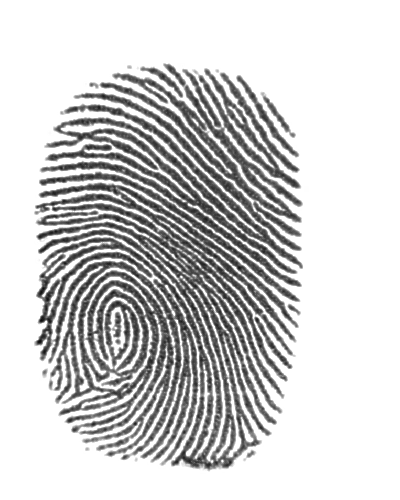

In [108]:
MASIVE_high_quality_image=MASIVE_Session1_df.iloc[281]['Filename']
display(Image.open(MASIVE_high_quality_image))

In [109]:
MASIVE_low_df=MASIVE_df[MASIVE_Session1_df['QualityScore']==0]
MASIVE_low_df.head()

C:\Users\2544403\AppData\Local\Temp\ipykernel_8388\581660048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Filename,FingerCode,QualityScore,OptionalError,Quantized,Resampled,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_0,FDA_Bin10_1,FDA_Bin10_2,FDA_Bin10_3,FDA_Bin10_4,FDA_Bin10_5,FDA_Bin10_6,FDA_Bin10_7,FDA_Bin10_8,FDA_Bin10_9,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinCount_COMMinRect200x200,FingerJetFX_MinutiaeCount,FJFXPos_Mu_MinutiaeQuality_2,FJFXPos_OCL_MinutiaeQuality_80,ImgProcROIArea_Mean,LCS_Bin10_0,LCS_Bin10_1,LCS_Bin10_2,LCS_Bin10_3,LCS_Bin10_4,LCS_Bin10_5,LCS_Bin10_6,LCS_Bin10_7,LCS_Bin10_8,LCS_Bin10_9,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_0,OCL_Bin10_1,OCL_Bin10_2,OCL_Bin10_3,OCL_Bin10_4,OCL_Bin10_5,OCL_Bin10_6,OCL_Bin10_7,OCL_Bin10_8,OCL_Bin10_9,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_0,OF_Bin10_1,OF_Bin10_2,OF_Bin10_3,OF_Bin10_4,OF_Bin10_5,OF_Bin10_6,OF_Bin10_7,OF_Bin10_8,OF_Bin10_9,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_0,RVUP_Bin10_1,RVUP_Bin10_2,RVUP_Bin10_3,RVUP_Bin10_4,RVUP_Bin10_5,RVUP_Bin10_6,RVUP_Bin10_7,RVUP_Bin10_8,RVUP_Bin10_9,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,dataset
754,C:\Users\2544403\Downloads\images_and_metadata...,0,0.0,NaN,0,0,58.52491,137.60471,255.0,134448.0,51.0,13.0,6.0,2.0,1.0,1.0,0.0,0.0,0.0,44.0,0.52480,0.36863,105.0,255.0,0.74117,0.0,123.65076,0.0,97.0,4.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,0.33070,0.35341,141.81172,137.60471,45.0,46.0,16.0,11.0,5.0,4.0,5.0,2.0,1.0,2.0,0.42893,0.18745,5.0,4.0,5.0,9.0,10.0,25.0,32.0,103.0,74.0,101.0,0.54975,0.38832,0.31499,171.67461,88.0,131.0,13.0,3.0,147.0,21.0,74.0,174.0,0.0,0.0,1.45897,1.36663,MASIVE
1394,C:\Users\2544403\Downloads\images_and_metadata...,0,0.0,NaN,0,0,56.59713,193.33143,239.0,79228.0,18.0,8.0,6.0,3.0,4.0,1.0,0.0,1.0,0.0,35.0,0.61431,0.35935,180.0,239.0,0.07113,0.0,154.65764,0.0,59.0,3.0,8.0,3.0,1.0,1.0,1.0,0.0,0.0,0.51223,0.30063,197.59463,193.33143,52.0,21.0,11.0,8.0,3.0,2.0,1.0,1.0,0.0,1.0,0.36222,0.18932,2.0,1.0,0.0,0.0,2.0,7.0,9.0,75.0,69.0,65.0,0.61125,0.34479,0.25622,87.37341,54.0,56.0,6.0,6.0,51.0,14.0,26.0,80.0,0.0,0.0,1.56031,1.70710,MASIVE
1567,C:\Users\2544403\Downloads\images_and_metadata...,0,0.0,NaN,0,0,66.51862,137.56829,206.0,91106.0,14.0,16.0,17.0,5.0,5.0,2.0,3.0,0.0,0.0,17.0,0.45422,0.28928,106.0,206.0,0.52427,0.0,124.49307,0.0,49.0,12.0,9.0,1.0,4.0,0.0,2.0,1.0,1.0,0.61263,0.24189,142.21299,137.56829,29.0,21.0,16.0,9.0,6.0,2.0,0.0,1.0,1.0,1.0,0.43538,0.18922,1.0,1.0,1.0,5.0,15.0,20.0,45.0,57.0,41.0,52.0,0.48094,0.37200,0.31626,119.86309,39.0,41.0,9.0,6.0,50.0,26.0,25.0,79.0,0.0,0.0,1.53821,1.44898,MASIVE
1569,C:\Users\2544403\Downloads\images_and_metadata...,0,0.0,NaN,0,0,59.04968,147.82330,255.0,101895.0,29.0,12.0,7.0,1.0,4.0,4.0,0.0,0.0,0.0,28.0,0.51249,0.34507,127.0,255.0,0.58039,0.0,136.78697,0.0,67.0,10.0,4.0,0.0,1.0,1.0,0.0,0.0,2.0,0.44198,0.33072,151.44903,147.82330,36.0,34.0,13.0,7.0,3.0,2.0,2.0,2.0,1.0,3.0,0.42900,0.19124,0.0,2.0,5.0,5.0,9.0,13.0,28.0,53.0,64.0,74.0,0.59514,0.41189,0.30111,126.46851,42.0,73.0,13.0,9.0,85.0,18.0,51.0,86.0,0.0,0.0,1.41323,1.36793,MASIVE
1729,C:\Users\2544403\Downloads\images_and_metadata...,0,0.0,NaN,0,0,62.35312,169.63237,166.0,71122.0,13.0,6.0,8.0,9.0,4.0,4.0,0.0,0.0,0.0,16.0,0.49163,0.31008,120.0,166.0,0.37951,0.0,158.73341,0.0,38.0,7.0,7.0,1.0,2.0,1.0,2.0,2.0,0.0,0.59251,0.27113,174.68813,169.63237,10.0,19.0,18.0,7.0,11.0,2.0,1.0,0.0,1.0,0.0,0.50639,0.15447,1.0,5.0,6.0,12.0,11.0,22.0,21.0,30.0,20.0,34.0,0.42645,0.39091,0.35132,106.45157,39.0,40.0,6.0,11.0,50.0,27.0,25.0,48.0,0.0,0.0,1.40117,1.33786,MASIVE


In [112]:
row=MASIVE_Session1_df.iloc[754]
row

Filename                                 C:\Users\2544403\Downloads\images_and_metadata...
QualityScore                                                                             0
UniformImage                                                                      58.52491
EmptyImageOrContrastTooLow                                                       137.60471
FingerprintImageWithMinutiae                                                           255
SufficientFingerprintForeground                                                     134448
FDA_Bin10_Mean                                                                      0.5248
FDA_Bin10_StdDev                                                                   0.36863
FingerJetFX_MinutiaeCount                                                              255
ImgProcROIArea_Mean                                                              123.65076
LCS_Bin10_Mean                                                                      0.3307

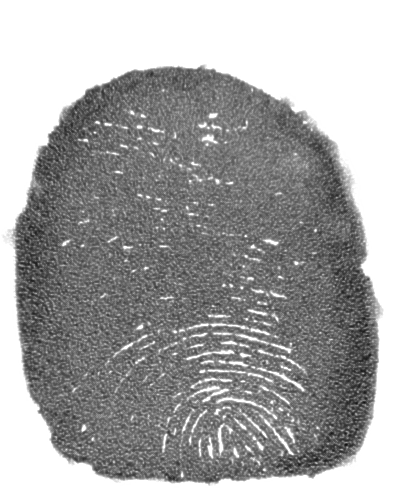

In [110]:
MASIVE_low_quality_image=MASIVE_Session1_df.iloc[754]['Filename']
display(Image.open(MASIVE_low_quality_image))

In [113]:
SOCOFing_high_df=SOCOFING_df[SOCOFING_df['QualityScore']==72]
SOCOFing_high_df.head()

,Filename,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,image_name,participant_id,Gender,Hand,Finger_type,dataset
1383,C:/Users/2544403/Downloads/SOCOFing_processed_...,72.0,92.47666,168.16568,25.0,147417.0,0.52768,0.20278,25.0,112.38768,0.77337,0.18898,165.08812,168.16568,0.7045,0.21111,0.19824,0.27294,0.60745,394.2361,1.08127,0.3478,225__M_Left_ring_finger.png,M_Left_ring_finger.png,M,Left,ring,SOCOFing


In [114]:
row=SOCOFING_df.iloc[1383]
row

Filename                                 C:/Users/2544403/Downloads/SOCOFing_processed_...
QualityScore                                                                          72.0
UniformImage                                                                      92.47666
EmptyImageOrContrastTooLow                                                       168.16568
FingerprintImageWithMinutiae                                                          25.0
SufficientFingerprintForeground                                                   147417.0
FDA_Bin10_Mean                                                                     0.52768
FDA_Bin10_StdDev                                                                   0.20278
FingerJetFX_MinutiaeCount                                                             25.0
ImgProcROIArea_Mean                                                              112.38768
LCS_Bin10_Mean                                                                     0.77337

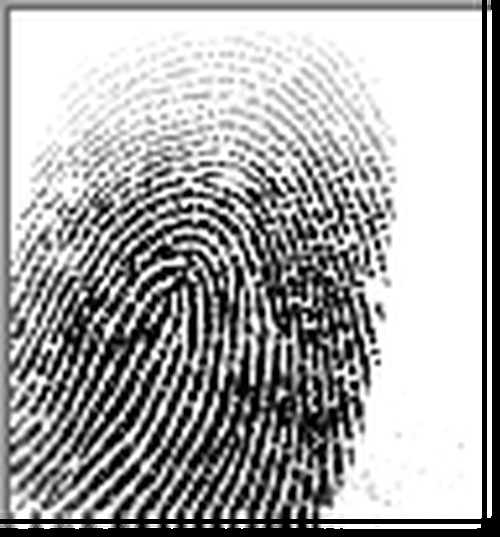

In [115]:
SOCOFing_high_quality_image=SOCOFING_df.iloc[1383]['Filename']
display(Image.open(SOCOFing_high_quality_image))

In [118]:
SOCOFing_low_df=SOCOFING_df[SOCOFING_df['QualityScore']==16]
SOCOFing_low_df.head()

,Filename,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,image_name,participant_id,Gender,Hand,Finger_type,dataset
3398,C:/Users/2544403/Downloads/SOCOFing_processed_...,16.0,118.32229,122.4909,47.0,153212.0,0.79214,0.2856,47.0,32.33127,0.44821,0.41572,119.49725,122.4909,0.61221,0.27952,0.61525,0.35031,0.39185,261.3688,1.28275,0.9719,406__M_Right_ring_finger.png,M_Right_ring_finger.png,M,Right,ring,SOCOFing


In [121]:
row=SOCOFING_df[SOCOFING_df['QualityScore']==16]
row

,Filename,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground,FDA_Bin10_Mean,FDA_Bin10_StdDev,FingerJetFX_MinutiaeCount,ImgProcROIArea_Mean,LCS_Bin10_Mean,LCS_Bin10_StdDev,MMB,Mu,OCL_Bin10_Mean,OCL_Bin10_StdDev,OF_Bin10_Mean,OF_Bin10_StdDev,OrientationMap_ROIFilter_CoherenceRel,OrientationMap_ROIFilter_CoherenceSum,RVUP_Bin10_Mean,RVUP_Bin10_StdDev,image_name,participant_id,Gender,Hand,Finger_type,dataset
3398,C:/Users/2544403/Downloads/SOCOFing_processed_...,16.0,118.32229,122.4909,47.0,153212.0,0.79214,0.2856,47.0,32.33127,0.44821,0.41572,119.49725,122.4909,0.61221,0.27952,0.61525,0.35031,0.39185,261.3688,1.28275,0.9719,406__M_Right_ring_finger.png,M_Right_ring_finger.png,M,Right,ring,SOCOFing


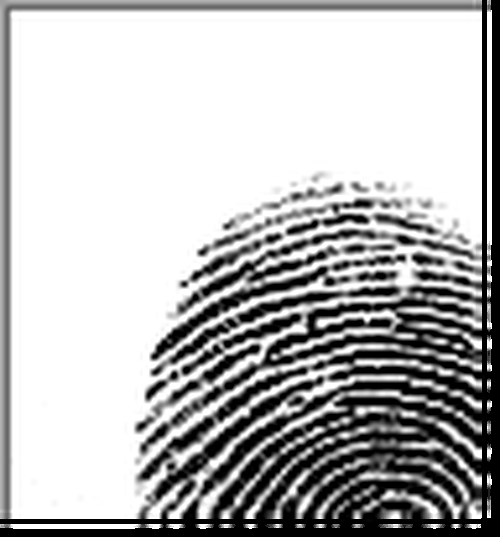

In [34]:
SOCOFing_low_quality_image=SOCOFING_df.iloc[SOCOFING_df['QualityScore'].idxmin()]['Filename']
display(Image.open(SOCOFing_low_quality_image))

In [129]:
MASSIVE_correlation_MATRIX=final[['QualityScore','UniformImage','EmptyImageOrContrastTooLow','FingerprintImageWithMinutiae','SufficientFingerprintForeground']].corr()

In [130]:
MASSIVE_correlation_MATRIX

,QualityScore,UniformImage,EmptyImageOrContrastTooLow,FingerprintImageWithMinutiae,SufficientFingerprintForeground
QualityScore,1.000000,-0.276749,0.285560,-0.251339,-0.227588
UniformImage,-0.276749,1.000000,-0.793384,-0.163089,0.780165
EmptyImageOrContrastTooLow,0.285560,-0.793384,1.000000,-0.069462,-0.793774
FingerprintImageWithMinutiae,-0.251339,-0.163089,-0.069462,1.000000,-0.024061
SufficientFingerprintForeground,-0.227588,0.780165,-0.793774,-0.024061,1.000000


In [131]:
pip install fingerprint_enhancer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fingerprint_enhancer: filename=fingerprint_enhancer-0.0.13-py3-none-any.whl size=8924 sha256=452400b4edee273c02cd326f5a39aa071727072fc2e731aabe0b16d555653e9c
  Stored in directory: c:\users\2544403\appdata\local\pip\cache\wheels\9e\e2\93\b9c38a2b9f8aeb1d89fc3cb9718aefeb038e3576cbd8164f41
Successfully built fingerprint_enhancer
Note: you may need to restart the kernel to use updated packages.


In [20]:
import fingerprint_enhancer
import cv2

def enhance_images_in_folder(input_folder_path, output_folder_path):
     # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)
    img_files = [file for file in os.listdir(input_folder_path) if file.lower().endswith('.png')]
    for img_file in img_files:
        input_path = os.path.join(input_folder_path, img_file)
        output_path = os.path.join(output_folder_path, img_file)
        img=cv2.imread(input_path,0)
        out=fingerprint_enhancer.enhance_Fingerprint(img)
        cv2.imwrite(output_path,out)
               

In [21]:
input_folder_path = 'C:/Users/2544403/Downloads/SOCOFing_processed_images'
output_folder_path='C:/Users/2544403/Downloads/SOCOFing_enhanced_images'

In [22]:
enhance_images_in_folder(input_folder_path, output_folder_path)

In [24]:
#SOCOFing images are in same file so this way we can get all image names in same file
IMAGE_DIRECTORY = "C:/Users/2544403/Downloads/SOCOFing_enhanced_images"
OUTPUT_FILE = "C:/Users/2544403/Downloads/SOCOFing_enhanced_images.txt"
image_files = [f for f in os.listdir(IMAGE_DIRECTORY) if f.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".bmp"))]
# Write image names to the output file
with open(OUTPUT_FILE, 'w') as file:
    for image_file in image_files:
        file.write( "C:/Users/2544403/Downloads/SOCOFing_enhanced_images/" + image_file + '\n')

In [26]:
import pandas as pd
enhanced_SOCOFING_df=pd.read_csv("C:/Users/2544403/Downloads/SOCOFing_enhanced_images_output.csv")
enhanced_SOCOFING_df.dropna(subset=['QualityScore'],inplace = True)
enhanced_SOCOFING_df["image_name"]=enhanced_SOCOFING_df["Filename"].str.split('/',n=5).str[5]
enhanced_SOCOFING_df["participant_id"]=enhanced_SOCOFING_df["image_name"].str.split('_',n=2).str[2]
enhanced_SOCOFING_df["Gender"]=enhanced_SOCOFING_df["image_name"].str.split('_').str[2]
enhanced_SOCOFING_df["Hand"]=enhanced_SOCOFING_df["image_name"].str.split('_').str[3]
enhanced_SOCOFING_df["Finger_type"]=enhanced_SOCOFING_df["image_name"].str.split('_').str[4]

C:\Users\2544403\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [34]:
bin_ranges=[i for i in range(0, 101, 10)]
enhanced_SOCOFING_df['quality_score_bins_x'] = pd.cut(enhanced_SOCOFING_df['QualityScore'], bins=bin_ranges)
SOCOFING_df['quality_score_bins_y'] = pd.cut(SOCOFING_df['QualityScore'], bins=bin_ranges)

In [35]:
dfinal = enhanced_SOCOFING_df.merge(SOCOFING_df, on="image_name", how = 'inner')

In [37]:
dfinal['difference']=dfinal['QualityScore_x']-dfinal['QualityScore_y']

In [38]:
dfinal.head()

,Filename_x,FingerCode_x,QualityScore_x,OptionalError_x,Quantized_x,Resampled_x,UniformImage_x,EmptyImageOrContrastTooLow_x,FingerprintImageWithMinutiae_x,SufficientFingerprintForeground_x,...,RVUP_Bin10_8_y,RVUP_Bin10_9_y,RVUP_Bin10_Mean_y,RVUP_Bin10_StdDev_y,participant_id_y,Gender_y,Hand_y,Finger_type_y,quality_score_bins_y,difference
0,C:/Users/2544403/Downloads/SOCOFing_enhanced_i...,0,45.0,NaN,0,0,119.75962,83.75206,80.0,267854.0,...,0.0,0.0,1.01096,0.32047,M_Left_index_finger.png,M,Left,index,"(40, 50]",2.0
1,C:/Users/2544403/Downloads/SOCOFing_enhanced_i...,0,53.0,NaN,0,0,112.86226,68.18424,78.0,172873.0,...,0.0,0.0,1.18393,1.06346,M_Left_little_finger.png,M,Left,little,"(30, 40]",14.0
2,C:/Users/2544403/Downloads/SOCOFing_enhanced_i...,0,58.0,NaN,0,0,121.39271,88.51206,43.0,268500.0,...,0.0,0.0,1.01670,0.28534,M_Left_middle_finger.png,M,Left,middle,"(40, 50]",8.0
3,C:/Users/2544403/Downloads/SOCOFing_enhanced_i...,0,49.0,NaN,0,0,119.37389,82.71022,47.0,268500.0,...,0.0,0.0,1.14143,0.74640,M_Left_ring_finger.png,M,Left,ring,"(40, 50]",0.0
4,C:/Users/2544403/Downloads/SOCOFing_enhanced_i...,0,55.0,NaN,0,0,119.06751,81.90201,50.0,189120.0,...,0.0,0.0,1.00731,0.26601,M_Left_thumb_finger.png,M,Left,thumb,"(40, 50]",7.0


In [49]:
row=dfinal[dfinal['difference']== -24]
row

,Filename_x,FingerCode_x,QualityScore_x,OptionalError_x,Quantized_x,Resampled_x,UniformImage_x,EmptyImageOrContrastTooLow_x,FingerprintImageWithMinutiae_x,SufficientFingerprintForeground_x,FDA_Bin10_0_x,FDA_Bin10_1_x,FDA_Bin10_2_x,FDA_Bin10_3_x,FDA_Bin10_4_x,FDA_Bin10_5_x,FDA_Bin10_6_x,FDA_Bin10_7_x,FDA_Bin10_8_x,FDA_Bin10_9_x,FDA_Bin10_Mean_x,FDA_Bin10_StdDev_x,FingerJetFX_MinCount_COMMinRect200x200_x,FingerJetFX_MinutiaeCount_x,FJFXPos_Mu_MinutiaeQuality_2_x,FJFXPos_OCL_MinutiaeQuality_80_x,ImgProcROIArea_Mean_x,LCS_Bin10_0_x,LCS_Bin10_1_x,LCS_Bin10_2_x,LCS_Bin10_3_x,LCS_Bin10_4_x,LCS_Bin10_5_x,LCS_Bin10_6_x,LCS_Bin10_7_x,LCS_Bin10_8_x,LCS_Bin10_9_x,LCS_Bin10_Mean_x,LCS_Bin10_StdDev_x,MMB_x,Mu_x,OCL_Bin10_0_x,OCL_Bin10_1_x,OCL_Bin10_2_x,OCL_Bin10_3_x,OCL_Bin10_4_x,OCL_Bin10_5_x,OCL_Bin10_6_x,OCL_Bin10_7_x,OCL_Bin10_8_x,OCL_Bin10_9_x,OCL_Bin10_Mean_x,OCL_Bin10_StdDev_x,OF_Bin10_0_x,OF_Bin10_1_x,OF_Bin10_2_x,OF_Bin10_3_x,OF_Bin10_4_x,OF_Bin10_5_x,OF_Bin10_6_x,OF_Bin10_7_x,OF_Bin10_8_x,OF_Bin10_9_x,OF_Bin10_Mean_x,OF_Bin10_StdDev_x,OrientationMap_ROIFilter_CoherenceRel_x,OrientationMap_ROIFilter_CoherenceSum_x,RVUP_Bin10_0_x,RVUP_Bin10_1_x,RVUP_Bin10_2_x,RVUP_Bin10_3_x,RVUP_Bin10_4_x,RVUP_Bin10_5_x,RVUP_Bin10_6_x,RVUP_Bin10_7_x,RVUP_Bin10_8_x,RVUP_Bin10_9_x,RVUP_Bin10_Mean_x,RVUP_Bin10_StdDev_x,image_name,participant_id_x,Gender_x,Hand_x,Finger_type_x,quality_score_bins_x,Filename_y,FingerCode_y,QualityScore_y,OptionalError_y,Quantized_y,Resampled_y,UniformImage_y,EmptyImageOrContrastTooLow_y,FingerprintImageWithMinutiae_y,SufficientFingerprintForeground_y,FDA_Bin10_0_y,FDA_Bin10_1_y,FDA_Bin10_2_y,FDA_Bin10_3_y,FDA_Bin10_4_y,FDA_Bin10_5_y,FDA_Bin10_6_y,FDA_Bin10_7_y,FDA_Bin10_8_y,FDA_Bin10_9_y,FDA_Bin10_Mean_y,FDA_Bin10_StdDev_y,FingerJetFX_MinCount_COMMinRect200x200_y,FingerJetFX_MinutiaeCount_y,FJFXPos_Mu_MinutiaeQuality_2_y,FJFXPos_OCL_MinutiaeQuality_80_y,ImgProcROIArea_Mean_y,LCS_Bin10_0_y,LCS_Bin10_1_y,LCS_Bin10_2_y,LCS_Bin10_3_y,LCS_Bin10_4_y,LCS_Bin10_5_y,LCS_Bin10_6_y,LCS_Bin10_7_y,LCS_Bin10_8_y,LCS_Bin10_9_y,LCS_Bin10_Mean_y,LCS_Bin10_StdDev_y,MMB_y,Mu_y,OCL_Bin10_0_y,OCL_Bin10_1_y,OCL_Bin10_2_y,OCL_Bin10_3_y,OCL_Bin10_4_y,OCL_Bin10_5_y,OCL_Bin10_6_y,OCL_Bin10_7_y,OCL_Bin10_8_y,OCL_Bin10_9_y,OCL_Bin10_Mean_y,OCL_Bin10_StdDev_y,OF_Bin10_0_y,OF_Bin10_1_y,OF_Bin10_2_y,OF_Bin10_3_y,OF_Bin10_4_y,OF_Bin10_5_y,OF_Bin10_6_y,OF_Bin10_7_y,OF_Bin10_8_y,OF_Bin10_9_y,OF_Bin10_Mean_y,OF_Bin10_StdDev_y,OrientationMap_ROIFilter_CoherenceRel_y,OrientationMap_ROIFilter_CoherenceSum_y,RVUP_Bin10_0_y,RVUP_Bin10_1_y,RVUP_Bin10_2_y,RVUP_Bin10_3_y,RVUP_Bin10_4_y,RVUP_Bin10_5_y,RVUP_Bin10_6_y,RVUP_Bin10_7_y,RVUP_Bin10_8_y,RVUP_Bin10_9_y,RVUP_Bin10_Mean_y,RVUP_Bin10_StdDev_y,participant_id_y,Gender_y,Hand_y,Finger_type_y,quality_score_bins_y,difference
5955,C:/Users/2544403/Downloads/SOCOFing_enhanced_i...,0,29.0,NaN,0,0,109.69165,62.50776,255.0,268500.0,6.0,13.0,10.0,13.0,16.0,11.0,14.0,12.0,5.0,89.0,0.66817,0.31727,72.0,255.0,0.1098,0.3647,62.50776,0.0,58.0,5.0,3.0,5.0,10.0,6.0,12.0,21.0,69.0,0.60801,0.39803,61.94961,62.50776,1.0,0.0,2.0,12.0,16.0,33.0,57.0,49.0,21.0,6.0,0.77981,0.09109,14.0,34.0,67.0,84.0,78.0,55.0,50.0,71.0,42.0,43.0,0.25386,0.34285,0.48511,527.80552,36.0,17.0,6.0,11.0,27.0,14.0,25.0,45.0,0.0,0.0,1.37122,1.00951,9__M_Right_thumb_finger.png,M_Right_thumb_finger.png,M,Right,thumb,"(20, 30]",C:/Users/2544403/Downloads/SOCOFing_processed_...,0,53.0,NaN,0,0,97.94353,158.51522,115.0,187559.0,2.0,3.0,1.0,2.0,9.0,6.0,11.0,18.0,29.0,119.0,0.79045,0.26552,34.0,115.0,0.5826,0.40869,128.70293,0.0,112.0,3.0,5.0,3.0,8.0,7.0,6.0,10.0,46.0,0.39369,0.42944,155.34126,158.51522,6.0,15.0,23.0,22.0,20.0,23.0,21.0,28.0,35.0,35.0,0.73966,0.17897,13.0,15.0,22.0,29.0,57.0,88.0,103.0,135.0,66.0,63.0,0.34174,0.34808,0.61805,501.24254,3.0,6.0,4.0,7.0,19.0,8.0,4.0,3.0,0.0,0.0,1.0671,0.41083,M_Right_thumb_finger.png,M,Right,thumb,"(50, 60]",-24.0


C:/Users/2544403/Downloads/SOCOFing_enhanced_images/389__F_Left_ring_finger.png


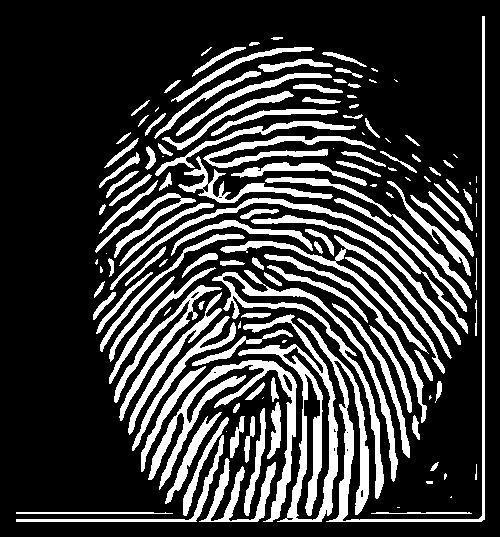

In [48]:
SOCOFing_enhanced_low_quality_image=dfinal.iloc[3166]['Filename_x']
print(SOCOFing_enhanced_low_quality_image)
display(Image.open(SOCOFing_enhanced_low_quality_image))